In [39]:
import tensorflow as tf

from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
noise = np.random.uniform(-50, 50, 100)

In [41]:
X = np.linspace(-20,20,100)

In [42]:
y = 3*X*X + 5*X + 10 + noise

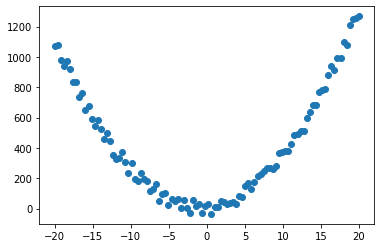

In [43]:
plt.scatter(X,y)

In [44]:
X_mod = (X - X.mean())/ X.std()

In [45]:
y_mod = (y - y.mean())/y.std()

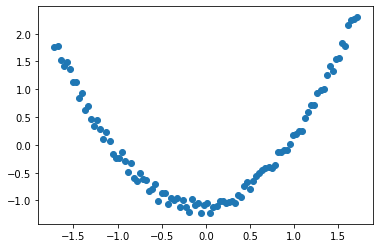

In [46]:
plt.scatter(X_mod,y_mod)

In [47]:
X_tf = tf.constant(X_mod, dtype="float64")
y_tf = tf.constant(y_mod, dtype="float64")

In [54]:
a = tf.Variable(0., dtype="float64")
b = tf.Variable(0., dtype="float64")
c = tf.Variable(0., dtype="float64")

In [61]:
iters, lr = 100, 0.1

In [62]:
def gradient_dec(X, y):
    
    with tf.GradientTape() as tape:
        y_h = a*X*X + b*X + c
        error = y - y_h
        loss = tf.reduce_mean(error**2)
        da, db, dc = tape.gradient(loss, [a, b, c])

        a.assign_sub(lr*da)
        b.assign_sub(lr*db)    
        c.assign_sub(lr*dc)    
        
        return loss

In [63]:
for i in range(iters):
    gradient_dec(X_tf, y_tf)

In [64]:
y_pred = a*X_tf*X_tf + b*X_tf + c

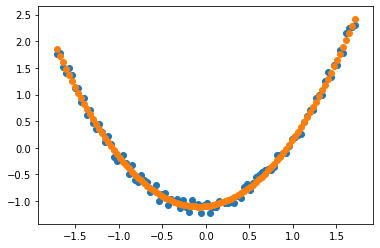

In [65]:
plt.scatter(X_tf, y_tf)
plt.scatter(X_tf, y_pred)